# Шаг 1. Теоретическая часть

## Выведите аналитическое решение задачи регрессии. Используйте векторную форму уравнения

### Шаг 1

У нас есть: 

* $ X \in R^{n * m} $ - входной вектор признаков (n объектов и m признаков)
* $ y \in R^{n} $ - вектор целевой переменной (то есть то, что нам нужно предсказать)

Задача сводится к следующему: нам необходимо найти такие веса $ w \in R^{m} $, чтобы минимизировать MSE (или иными словами Loss-функцию)
### $ L(w, X, y) = 1 / n * ( \sum_{i=1}^n(y_i - w^T*x_i) ) -> min $


### Шаг 2

1. Перезапишем формулу в матричной форме:
* $ L(w) = 1 / n * (y - X*w)^{T} * (y - X*w) $, где y - вектор ответов, X - вектор признаков, w - вектор весов


2. Раскроем скобочки (для фокусирования на задаче я временно уберу 1/n, т.к это консанта -> ее не минимизируешь)
* Формула: $ (A - B)^{T}(A - B) = A^TA - A^TB - B^TA + B^TB $
* Наше выражение: $ (y - Xw)^T * (y - Xw) = y^Ty - y^TXw - (Xw)^Ty + (Xw)^TXw$

3. Упростим выражение 
* Оба выражения $ y^TXw $ и $ (Xw)^Ty $ являются скалярными произведениями, поскольку скалярное произведение коммутативно, то   
 $y^TXw = (Xw)^Ty  $ 

* Получаем новую формулу: $ y^Ty - y^TXw - y^TXw + (Xw)^TXw = y^Ty - 2y^T(Xw) + (Xw)^TXw$

### Шаг 3

После предыдущего шага функция потерь имеет следующий вид: $ L(w, X, y) =  y^Ty - 2y^T(Xw) + (Xw)^TXw-> min $

Итого, мы имеем функцию, у которой хотим найти точку локального минимума -> нужно приравнять производную по w (вектору весов) к нулю $ \frac{{\partial}}{\partial w} [y^Ty - 2y^T(Xw) + (Xw)^TXw] = 0 $


При дифференцировании по w выражение $ y^Ty $ - константа относительно w, её производная равна 0


Остальное выражение «под скобками» раскрываем согласно правилам матричного дифференцирования, а конкретно нужно 2 факта: 
1. Если $ f(x) = a^Tw $, где a - постоянный вектор, то: 
$ \frac{{\partial}}{\partial w} [a^Tw] = a$
2. Если $ f(x) = w^TAw $, где A - симметричная матрица m x m, то: $ \frac{{\partial}}{\partial w} [w^TAw] = 2Aw $


* Производная 1 слагаемого $ -2y^T(Xw) $ : $ y^T(Xw) = (X^Ty)^Tw $, где $ a = (X^Ty)^T $

* Следовательно $ \frac{{\partial}}{\partial w} [-2y^T(Xw)] = -2X^Ty $


* Производная 2 слагаемого $ (Xw)^TXw $: $ (Xw)^TXw = w^T(X^TX)w $, где A - $X^TX$ симметричная матрица размером m x m

* Следовательно $ \frac{{\partial}}{\partial w} [(Xw)^TXw] = 2X^TXw $

Итого $ \frac{{\partial}}{\partial w} [y^Ty - 2y^T(Xw) + (Xw)^TXw] = -2X^Ty + 2X^TXw $

* Упростим уравнение
$ -2X^Ty + 2X^TXw = 0 $

* $ X^TXw = X^Ty $

* $ w = (X^TX)^{-1}*X^T*y $

### $ w^{*} = (X^TX)^{-1}*X^T*y$ - Аналитическое решение линейной регрессии

## Какие изменения произойдут в решении при добавлении L1- и L2-регуляризации к функции потерь?

Функции потерь примут следующий вид: 

* L1: функция $ L(w, X, y) = ||y-Xw||^2 + \lambda||w||_1$
* L2: функция $ L(w, X, y) = ||y-Xw||^2 + \lambda ||w||_2^2$

где 
* $ ||w||_1 = \sum_{i=1}^n |w_i| $
* $ ||w||_2^2= \sum_{i=1}^n w_i^2 $

Аналитические решения:

* L2: $ w^{*} = (X^TX\lambda I)^{-1}*X^T*y$

* L1: модуль недифференцируем в нуле, поэтому явного аналитического решения нет (подбираем веса градиентным спуском)

## Объясните, почему L1-регуляризация часто используется для отбора признаков. Почему после обучения модели остается много весов, равных 0?

L1-регуляризация обнуляет веса, потому что у нее постоянный штраф, а постоянный штраф делает обнуление малых весов выгодным, в отличие от L2-регуляризации, которая имеет непостоянный штраф





## Объясните, как можно использовать те же модели (линейная регрессия, гребневая регрессия и т. д.), но при этом обеспечить возможность учета нелинейных зависимостей.

Используя Polynomial Features можно получить полином n-ой степени, который сможет достаточно хорошо аппроксимировать функцию, описывающую исходное распределение данных в выборке

# Шаг 2. Импорт библиотек и функции

In [37]:
!git clone https://github.com/bxbeta/s21_ML2

Cloning into 's21_ML2'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 11 (delta 0), reused 8 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (11/11), 109.40 KiB | 1009.00 KiB/s, done.


In [38]:
%cd /content/s21_ML2/src
!ls

/content/s21_ML2/src
classes  ML2.ipynb  s21_ML2  test.json	train.json


In [39]:
!ls

classes  ML2.ipynb  s21_ML2  test.json	train.json


In [40]:
import sys
sys.path.append('/content/s21_ML2/s21_ML2')

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from collections import Counter
from classes.regression_classes import SimpleLinearRegression, ClassicalGDLinearRegression, SGDLinearRegression
from classes.regression_classes import LassoLinearRegression, RidgeLinearRegression, ElasticNetLinearRegression
from classes.regression_classes import my_MSE, my_MAE, my_R2, my_RMSE

## Фун-я калькуляции метрик

In [42]:
def calculate_metrics(y_true, y_pred, model_name):
    
    return {
        'model': model_name,
        'R2': r2_score(y_true, y_pred),
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)), 
        'MSE': mean_squared_error(y_true, y_pred)
    }

## Фун-я сбора метрик в фрейм

In [43]:
def metrics_to_df(predictions: dict, y_test): 
    metrics_list = [] 

    for model_name, y_pred in predictions.items(): 
        metrics = calculate_metrics(y_test, y_pred, model_name) 
        metrics_list.append(metrics) 
        
    metrics_df = pd.DataFrame(metrics_list)
    return metrics_df

# Фун-я обучения всех моделей

In [44]:
def train_all_models(X_train: np.ndarray | pd.DataFrame, y_train: np.ndarray | pd.DataFrame | pd.Series, X_test: np.ndarray | pd.DataFrame, y_test: np.ndarray | pd.DataFrame | pd.Series) -> pd.DataFrame: 
    simple_model = SimpleLinearRegression()
    sgd_model = SGDLinearRegression(n_iter=100, batch_size=32, learning_rate=0.001) # learning_rate=0.001
    gd_model = ClassicalGDLinearRegression(n_iter=1000, learning_rate=0.001)
    sklearn_model = LinearRegression()
    
    lasso_model = LassoLinearRegression(n_iter=100, batch_size=32, alpha=0.001, learning_rate=0.001) # learning_rate=0.001 alpha=0.001
    ridge_model = RidgeLinearRegression(n_iter=100, batch_size=32, alpha=0.001, learning_rate=0.001)
    elastic_net_model = ElasticNetLinearRegression(n_iter=100, batch_size=32, alpha=0.001, learning_rate=0.001, l1_ratio=0.3)


    original_ridge = Ridge(alpha=0.001)
    original_lasso = Lasso(alpha=0.001) 
    original_elastic_net = ElasticNet(l1_ratio=0.3, alpha=0.001)
    
    simple_model.fit(X_train, y_train) 
    sgd_model.fit(X_train, y_train) 
    gd_model.fit(X_train, y_train) 
    sklearn_model.fit(X_train, y_train) 
    
    lasso_model.fit(X_train, y_train)
    ridge_model.fit(X_train, y_train)
    elastic_net_model.fit(X_train, y_train)

    original_ridge.fit(X_train, y_train)
    original_lasso.fit(X_train, y_train)
    original_elastic_net.fit(X_train, y_train)
    
    simple_model_pred = simple_model.predict(X_test)
    sgd_model_pred = sgd_model.predict(X_test)
    gd_model_pred = gd_model.predict(X_test)
    sklearn_model_pred = sklearn_model.predict(X_test)
    
    lasso_model_pred = lasso_model.predict(X_test)
    ridge_model_pred = ridge_model.predict(X_test)
    elastic_net_model_pred = elastic_net_model.predict(X_test)

    original_ridge_pred = original_ridge.predict(X_test)
    original_lasso_pred = original_lasso.predict(X_test)
    original_elastic_net_pred = original_elastic_net.predict(X_test)
    
    predictions_non_reg = {
        'My ' + simple_model.__class__.__name__: simple_model_pred, 
        'My ' + sgd_model.__class__.__name__: sgd_model_pred, 
        'My ' + gd_model.__class__.__name__: gd_model_pred, 
        'Default ' + sklearn_model.__class__.__name__: sklearn_model_pred
    }

    predictions_with_reg = {
        'My ' + lasso_model.__class__.__name__: lasso_model_pred, 
        'My ' + ridge_model.__class__.__name__: ridge_model_pred, 
        'My ' + elastic_net_model.__class__.__name__: elastic_net_model_pred, 
        'Default ' + original_lasso.__class__.__name__: original_lasso_pred, 
        'Default ' + original_ridge.__class__.__name__: original_ridge_pred, 
        'Default ' + original_elastic_net.__class__.__name__: original_elastic_net_pred
    }
    
    predictions = predictions_non_reg | predictions_with_reg 
    
    return metrics_to_df(predictions, y_test)


In [45]:
def train_overfitting_models(X_train: np.ndarray | pd.DataFrame, y_train: np.ndarray | pd.DataFrame | pd.Series, X_test: np.ndarray | pd.DataFrame, y_test: np.ndarray | pd.DataFrame | pd.Series) -> pd.DataFrame: 
    simple_model = SimpleLinearRegression()
    sgd_model = SGDLinearRegression(n_iter=1000, batch_size=32, learning_rate=1e-6)
    gd_model = ClassicalGDLinearRegression(n_iter=1000, learning_rate=1e-6)
    sklearn_model = LinearRegression()
    
    lasso_model = LassoLinearRegression(n_iter=1000, batch_size=32, alpha=100.0, learning_rate=1e-6) 
    ridge_model = RidgeLinearRegression(n_iter=1000, batch_size=32, alpha=100.0, learning_rate=1e-6)
    elastic_net_model = ElasticNetLinearRegression(n_iter=1000, batch_size=32, alpha=100.0, learning_rate=1e-6, l1_ratio=0.3)


    original_ridge = Ridge(alpha=100.0)
    original_lasso = Lasso(alpha=100.0) 
    original_elastic_net = ElasticNet(l1_ratio=0.3, alpha=100.0)
    
    simple_model.fit(X_train, y_train) 
    sgd_model.fit(X_train, y_train) 
    gd_model.fit(X_train, y_train) 
    sklearn_model.fit(X_train, y_train) 
    
    lasso_model.fit(X_train, y_train)
    ridge_model.fit(X_train, y_train)
    elastic_net_model.fit(X_train, y_train)

    original_ridge.fit(X_train, y_train)
    original_lasso.fit(X_train, y_train)
    original_elastic_net.fit(X_train, y_train)
    
    simple_model_pred = simple_model.predict(X_test)
    sgd_model_pred = sgd_model.predict(X_test)
    gd_model_pred = gd_model.predict(X_test)
    sklearn_model_pred = sklearn_model.predict(X_test)
    
    lasso_model_pred = lasso_model.predict(X_test)
    ridge_model_pred = ridge_model.predict(X_test)
    elastic_net_model_pred = elastic_net_model.predict(X_test)

    original_ridge_pred = original_ridge.predict(X_test)
    original_lasso_pred = original_lasso.predict(X_test)
    original_elastic_net_pred = original_elastic_net.predict(X_test)
    
    predictions_non_reg = {
        'My ' + simple_model.__class__.__name__: simple_model_pred, 
        'My ' + sgd_model.__class__.__name__: sgd_model_pred, 
        'My ' + gd_model.__class__.__name__: gd_model_pred, 
        'Default ' + sklearn_model.__class__.__name__: sklearn_model_pred
    }

    predictions_with_reg = {
        'My ' + lasso_model.__class__.__name__: lasso_model_pred, 
        'My ' + ridge_model.__class__.__name__: ridge_model_pred, 
        'My ' + elastic_net_model.__class__.__name__: elastic_net_model_pred, 
        'Default ' + original_lasso.__class__.__name__: original_lasso_pred, 
        'Default ' + original_ridge.__class__.__name__: original_ridge_pred, 
        'Default ' + original_elastic_net.__class__.__name__: original_elastic_net_pred
    }
    
    predictions = predictions_non_reg | predictions_with_reg 
    
    return metrics_to_df(predictions, y_test)


# Шаг 3. Предобработка и анализ данных

## Считывание данных

In [46]:
!pip install gdown -q
import gdown # type: ignore
import pandas as pd

# ID файла из вашей ссылки
train_file_id = '16o6Vc2HrvTzti6006Ib1PNiUCedeEET_'
test_file_id = '1cHgdmhQd6zgc2aTzQzCIAjR8_HcSI4hY'

# Скачиваем файлы
train_url = f'https://drive.google.com/uc?id={train_file_id}'
test_url = f'https://drive.google.com/uc?id={test_file_id}'

gdown.download(train_url, 'train.json', quiet=False)
gdown.download(test_url, 'test.json', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=16o6Vc2HrvTzti6006Ib1PNiUCedeEET_
To: /content/s21_ML2/src/train.json
100%|██████████| 70.6M/70.6M [00:00<00:00, 79.0MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1cHgdmhQd6zgc2aTzQzCIAjR8_HcSI4hY
From (redirected): https://drive.google.com/uc?id=1cHgdmhQd6zgc2aTzQzCIAjR8_HcSI4hY&confirm=t&uuid=b946ff2b-4fab-4cea-9e66-5b57efbd601f
To: /content/s21_ML2/src/test.json
100%|██████████| 106M/106M [00:02<00:00, 47.3MB/s] 


'test.json'

In [47]:
train_df = pd.read_json('train.json')
test_df = pd.read_json('test.json')

In [48]:
train_df.shape, test_df.shape

((49352, 15), (74659, 14))

Трактовка половинок в значениях bathrooms https://vk.com/@lesson.english-chto-nuzhno-znat-ob-amerikanskom-dome

In [49]:
train_df['bathrooms'].unique().tolist()

[1.0, 1.5, 2.0, 0.0, 3.0, 4.0, 2.5, 4.5, 3.5, 5.0, 6.0, 6.5, 5.5, 7.0, 10.0]

## Начальная корреляция признаков друг с другом и с целевой в неочищенном датасете

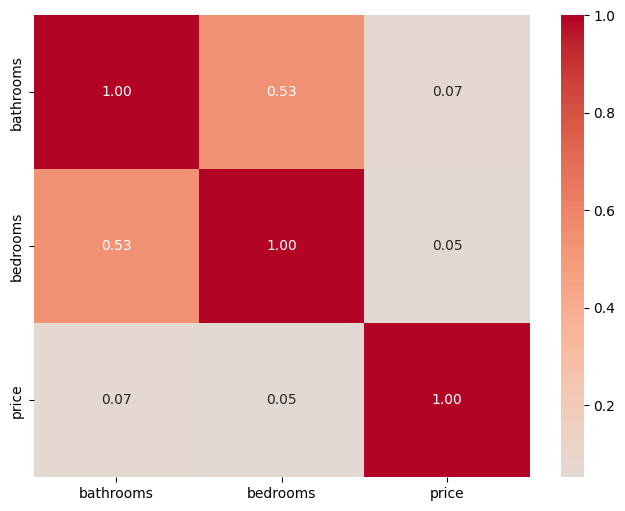

In [50]:
plt.figure(figsize=(8, 6))

corr_matrix = train_df[['bathrooms', 'bedrooms', 'price']].corr(method='pearson')
sns.heatmap(data=corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)

plt.show()

## Очистка тренировочных данных от выборосов

Очень большое среднее отклонение. Нужно проверять на выбросы

In [51]:
train_df['price'].std(), train_df['price'].mean()

(22066.86588468595, np.float64(3830.174035500081))

Видно, что у нас имеются выбросы, их нужно почистить/заменить

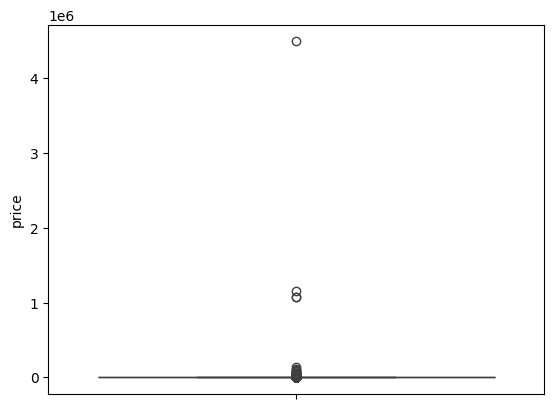

In [52]:
sns.boxplot(y=train_df['price'])
plt.show()

In [53]:
# clean_df = train_df.copy()
upper_bound = train_df['price'].quantile(0.99)
lower_bound = train_df['price'].quantile(0.01)

In [54]:
train_df.loc[train_df['price'] < lower_bound,'price'] = lower_bound
train_df.loc[train_df['price'] > upper_bound,'price'] = upper_bound

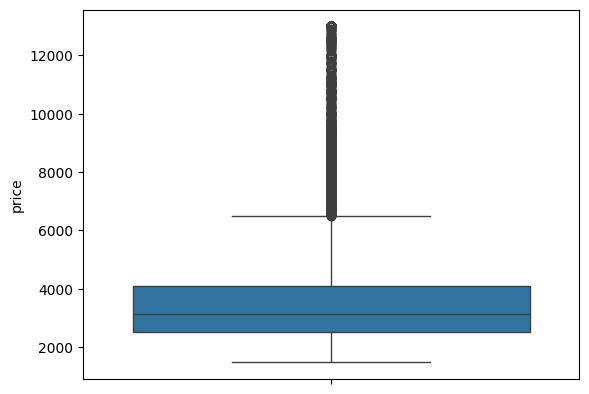

In [55]:
sns.boxplot(y=train_df['price'])
plt.show()

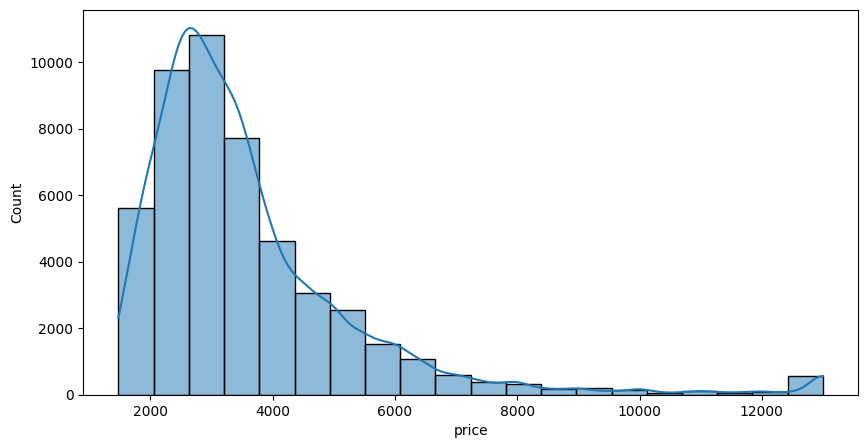

In [56]:
plt.figure(figsize=(10, 5))
sns.histplot(data=train_df, x='price', kde=True, bins=20)
plt.show()

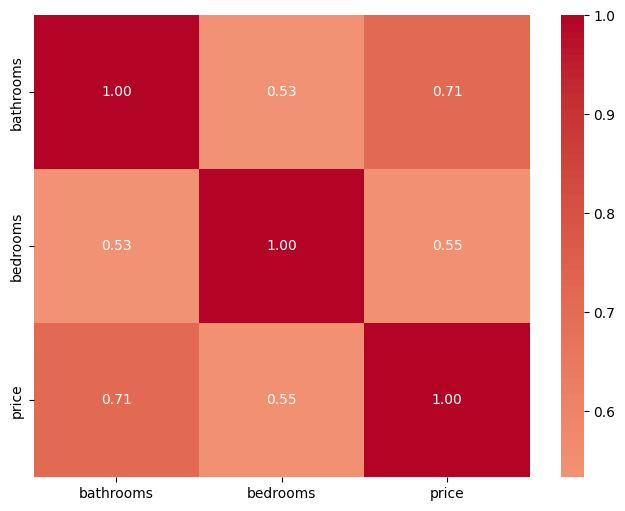

In [57]:
plt.figure(figsize=(8, 6))

corr_matrix = train_df[['bathrooms', 'bedrooms', 'price']].corr(method='pearson')
sns.heatmap(data=corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)

plt.show()

## Преобразование колонки features и определение топ-20 

In [58]:
train_df.head(3)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium


In [59]:
train_df['features'] = train_df['features'].apply(lambda x: [i.replace(' ', '').strip(',\'\"') for i in x])

In [60]:
all_features = [] 

for el in train_df['features']: 
    all_features.extend(el)

In [61]:
top_20_features = [i[0] for i in Counter(all_features).most_common(20)]
top_20_features

['Elevator',
 'CatsAllowed',
 'HardwoodFloors',
 'DogsAllowed',
 'Doorman',
 'Dishwasher',
 'NoFee',
 'LaundryinBuilding',
 'FitnessCenter',
 'Pre-War',
 'LaundryinUnit',
 'RoofDeck',
 'OutdoorSpace',
 'DiningRoom',
 'HighSpeedInternet',
 'Balcony',
 'SwimmingPool',
 'LaundryInBuilding',
 'NewConstruction',
 'Terrace']

In [62]:
for feature_name in top_20_features: 
    train_df[feature_name] = train_df['features'].apply(lambda x: 1 if feature_name in x else 0)

In [63]:
feature_list = ['bathrooms', 'bedrooms'] +  top_20_features

# Разбиение на тестовую и тренировочную выборки

In [64]:
features = train_df[feature_list]
target = train_df['price']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

# Шаг 4. Тестирование самописных классов LinearRegression, SGDLinearRegression, GDLinearRegression

## Инициализация и обучение моделек 

In [65]:
simple_model = SimpleLinearRegression()
sgd_model = SGDLinearRegression(n_iter=100, batch_size=32) 
gd_model = ClassicalGDLinearRegression(n_iter=1000)
sklearn_model = LinearRegression()

In [66]:
simple_model.fit(X_train, y_train) 
sgd_model.fit(X_train, y_train) 
gd_model.fit(X_train, y_train) 
sklearn_model.fit(X_train, y_train) 

Training SGDLinearRegression Model:   0%|          | 0/100 [00:00<?, ?it/s]

Training ClassicalGDLinearRegression Model:   0%|          | 0/1000 [00:00<?, ?it/s]

LinearRegression()

## Подсчет метрик для моделей классической линейной регрессии

In [67]:
simple_model_pred = simple_model.predict(X_test)
sgd_model_pred = sgd_model.predict(X_test)
gd_model_pred = gd_model.predict(X_test)
sklearn_model_pred = sklearn_model.predict(X_test)

In [68]:
predictions = {
    'My ' + simple_model.__class__.__name__: simple_model_pred, 
    'My ' + sgd_model.__class__.__name__: sgd_model_pred, 
    'My ' + gd_model.__class__.__name__: gd_model_pred, 
    'Default ' + sklearn_model.__class__.__name__: sklearn_model_pred
}

linear_regression_metrics = metrics_to_df(predictions, y_test)
linear_regression_metrics

,model,R2,MAE,RMSE,MSE
0,My SimpleLinearRegression,0.608233,757.329490,1146.873065,1.315318e+06
1,My SGDLinearRegression,0.603591,750.010742,1153.647445,1.330902e+06
2,My ClassicalGDLinearRegression,0.607378,756.940933,1148.123851,1.318188e+06
3,Default LinearRegression,0.608233,757.329490,1146.873065,1.315318e+06


# Шаг 5. Тестирование самописных классов Lasso, Ridge, ElasticNet

## Инициализация и обучение моделек

In [69]:
lasso_model = LassoLinearRegression(n_iter=100, batch_size=32, alpha=0.001, learning_rate=0.001)
ridge_model = RidgeLinearRegression(n_iter=100, batch_size=32, alpha=0.001, learning_rate=0.001)
elastic_net_model = ElasticNetLinearRegression(n_iter=100, batch_size=32, alpha=0.001, learning_rate=0.001, l1_ratio=0.3)


original_ridge = Ridge()
original_lasso = Lasso() 
original_elastic_net = ElasticNet()

In [70]:
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
elastic_net_model.fit(X_train, y_train)

original_ridge.fit(X_train, y_train)
original_lasso.fit(X_train, y_train)
original_elastic_net.fit(X_train, y_train)

Training LassoLinearRegression Model:   0%|          | 0/100 [00:00<?, ?it/s]

Training RidgeLinearRegression Model:   0%|          | 0/100 [00:00<?, ?it/s]

Training ElasticNetLinearRegression Model:   0%|          | 0/100 [00:00<?, ?it/s]

ElasticNet()

## Подсчет метрик моделей для моделей линейной регрессии с регуляризацией

In [71]:
lasso_model_pred = lasso_model.predict(X_test)
ridge_model_pred = ridge_model.predict(X_test)
elastic_net_model_pred = elastic_net_model.predict(X_test)

original_ridge_pred = original_ridge.predict(X_test)
original_lasso_pred = original_lasso.predict(X_test)
original_elastic_net_pred = original_elastic_net.predict(X_test)

In [72]:
lasso_model_pred = lasso_model.predict(X_test)
ridge_model_pred = ridge_model.predict(X_test)
elastic_net_model_pred = elastic_net_model.predict(X_test)

original_ridge_pred = original_ridge.predict(X_test)
original_lasso_pred = original_lasso.predict(X_test)
original_elastic_net_pred = original_elastic_net.predict(X_test)

In [73]:
predictions = {
    'My ' + lasso_model.__class__.__name__: lasso_model_pred, 
    'My ' + ridge_model.__class__.__name__: ridge_model_pred, 
    'My ' + elastic_net_model.__class__.__name__: elastic_net_model_pred, 
    'Default ' + original_lasso.__class__.__name__: original_lasso_pred, 
    'Default ' + original_ridge.__class__.__name__: original_ridge_pred, 
    'Default ' + original_elastic_net.__class__.__name__: original_elastic_net_pred
}

regularization_lin_reg_metrics = metrics_to_df(predictions, y_test)
regularization_lin_reg_metrics

,model,R2,MAE,RMSE,MSE
0,My LassoLinearRegression,0.608188,756.404271,1146.939243,1.315470e+06
1,My RidgeLinearRegression,0.608217,756.077272,1146.896799,1.315372e+06
2,My ElasticNetLinearRegression,0.608200,756.288007,1146.921430,1.315429e+06
3,Default Lasso,0.608056,756.641900,1147.131598,1.315911e+06
4,Default Ridge,0.608234,757.320987,1146.871484,1.315314e+06
5,Default ElasticNet,0.474999,854.586690,1327.643354,1.762637e+06


# Шаг 6. Нормализация признаков

## Сначала приведите несколько примеров того, почему и где нормализация признаков является обязательной, и наоборот.

Когда нужна:
* Нормализация признаков необходима при реализации обучения модели Лин.Регрессии с помощью градиентного спуска, так как сходимость градиента напрямую зависит от размера фичи -> например, кол-во комнат (1-6), расстояние до метро (от 0 до 3500 метров) -> по признаку расстояния шаг обновления градиента будет в разы больше -> имеем риск "перескочить" локальный минимум нашей функции потерь (чтобы не перескочить, нужно будет сильно уменьшать learning_rate)

* Также нормализация помогает составить линейной регрессии "адекватное" уравнение, так как ненормализованные признаки могут интерепретироваться в уравнении как критически важные -> они будут вносить больший вклад в итоговое уравнение -> например, цена квартиры = w0 + w1 * (кол-во комнат) + w2 * (расстояние до метро) -> очевидно, что в таком случае w2 получит очень маленькое значение, а w1 большое, таким образом интерпретиация весов признаков, влияющих на предсказание цены, будет являться некорректной. 
Например
* 1. Цена на однушку в москве возле метро  
* 2. Цена на двушку за мкадом без шаговой доступности до метро? 

Человеку очевидно, что дороже будет стоить первая квартира, но если интерпретировать веса модели -> вывод будет другим (кол-во комнат решает)

Когда можно обойтись без нее или вовсе не нужна: 
* Когда признаки в сопоставимых масштабах 
* Теоретически для аналитического решения линейной регрессии нормализация признаков тоже не нужна, так это математически корректно, но есть высокий риск численной нестабильности при плохой обусловленности 
> **Численная нестабильность** – это когда маленькое изменение во входных данных приводят к огромным (непредсказуемым) изменениям в вычислениях матрицы 

## Формуля для MinMaxScaler

### Классический MinMax просто сжимает все значения выборки в диапозон от 0 до 1
* $ X_{scaled} = \frac{(X - X_{min})}{(X_{max} - X_{min})} $
* $ X_{scaled} \in [0, 1] $

### MinMax с добавлением a и b просто сжимает все значения выборки в диапозон от a до b
* $ X_{scaled} = a + \frac{(X - X_{min}) * (b - a)}{(X_{max} - X_{min})} $
* $ X_{scaled} \in [a, b] $

## Разница между MinMaxScaler и StandardScaler

MinMaxScaler: 
* Сжимает данные в диапазон [0, 1] и ограничивает диапазон значений
* Чувствителен к выбросам 

StandardScaler
* Не ограничивает диапазон значений, сохраняет форму распределения данных 
* Не так сильно чувствителен к выбросам

## Фун-я MinMaxScaler

In [74]:
def my_MinMaxScaler(X: np.ndarray, a=0, b=1):
    X_min = X.min() 
    X_max = X.max()
    X_scaled = a + ((X - X_min) * (b - a)) / (X_max - X_min)
    
    return X_scaled

In [75]:
test = np.array([i for i in range(11)]) 
my_MinMaxScaler(test)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [76]:
scaler = MinMaxScaler()
scaler.fit_transform(test.reshape(-1, 1))

array([[0. ],
       [0.1],
       [0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6],
       [0.7],
       [0.8],
       [0.9],
       [1. ]])

## Фун-я StandardScaler

In [77]:
# StandardScaler делает так, чтобы все числа имели ср.знач = 0, а стандартное отклонение = 1. По сути он центрирует данные вокруг нуля
def my_StandardScaler(X: np.ndarray): 
    X_mean = X.mean() 
    X_std = X.std() 
    X_standarded = (X - X_mean) / X_std
    
    return X_standarded

In [78]:
my_StandardScaler(test)

array([-1.58113883, -1.26491106, -0.9486833 , -0.63245553, -0.31622777,
        0.        ,  0.31622777,  0.63245553,  0.9486833 ,  1.26491106,
        1.58113883])

In [79]:
std_scaler = StandardScaler()
std_scaler.fit_transform(test.reshape(-1, 1))

array([[-1.58113883],
       [-1.26491106],
       [-0.9486833 ],
       [-0.63245553],
       [-0.31622777],
       [ 0.        ],
       [ 0.31622777],
       [ 0.63245553],
       [ 0.9486833 ],
       [ 1.26491106],
       [ 1.58113883]])

# Шаг 7. Обучите пользовательские модели и модели sklearn на нормализованных данных.

In [80]:
feature_names = X_train.columns.tolist()

min_max_scaler = MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test) 

In [81]:
models_metrics_with_MinMaxScaler = train_all_models(X_train_scaled, y_train, X_test_scaled, y_test)

Training SGDLinearRegression Model:   0%|          | 0/100 [00:00<?, ?it/s]

Training ClassicalGDLinearRegression Model:   0%|          | 0/1000 [00:00<?, ?it/s]

Training LassoLinearRegression Model:   0%|          | 0/100 [00:00<?, ?it/s]

Training RidgeLinearRegression Model:   0%|          | 0/100 [00:00<?, ?it/s]

Training ElasticNetLinearRegression Model:   0%|          | 0/100 [00:00<?, ?it/s]

In [82]:
std_scaler = StandardScaler()
X_train_std_scaled = std_scaler.fit_transform(X_train)
X_test_std_scaled = std_scaler.transform(X_test) 

In [83]:
models_metrics_with_StandardScaler = train_all_models(X_train_std_scaled, y_train, X_test_std_scaled, y_test)

Training SGDLinearRegression Model:   0%|          | 0/100 [00:00<?, ?it/s]

Training ClassicalGDLinearRegression Model:   0%|          | 0/1000 [00:00<?, ?it/s]

Training LassoLinearRegression Model:   0%|          | 0/100 [00:00<?, ?it/s]

Training RidgeLinearRegression Model:   0%|          | 0/100 [00:00<?, ?it/s]

Training ElasticNetLinearRegression Model:   0%|          | 0/100 [00:00<?, ?it/s]

In [84]:
display(models_metrics_with_MinMaxScaler) 
display(models_metrics_with_StandardScaler)

,model,R2,MAE,RMSE,MSE
0,My SimpleLinearRegression,0.608233,757.329490,1146.873065,1.315318e+06
1,My SGDLinearRegression,0.544744,818.079090,1236.314421,1.528473e+06
2,My ClassicalGDLinearRegression,0.061634,1180.343342,1774.955551,3.150467e+06
3,Default LinearRegression,0.608233,757.329490,1146.873065,1.315318e+06
4,My LassoLinearRegression,0.544744,818.078787,1236.315552,1.528476e+06
5,My RidgeLinearRegression,0.537361,820.018361,1246.299694,1.553263e+06
6,My ElasticNetLinearRegression,0.542231,818.557205,1239.722358,1.536912e+06
7,Default Lasso,0.608233,757.328409,1146.872756,1.315317e+06
8,Default Ridge,0.608233,757.329393,1146.872886,1.315317e+06
9,Default ElasticNet,0.596252,768.819349,1164.277708,1.355543e+06


,model,R2,MAE,RMSE,MSE
0,My SimpleLinearRegression,0.608233,757.329490,1146.873065,1.315318e+06
1,My SGDLinearRegression,0.607724,757.304075,1147.617882,1.317027e+06
2,My ClassicalGDLinearRegression,0.532638,822.316397,1252.644385,1.569118e+06
3,Default LinearRegression,0.608233,757.329490,1146.873065,1.315318e+06
4,My LassoLinearRegression,0.607724,757.303895,1147.617883,1.317027e+06
5,My RidgeLinearRegression,0.607735,757.242066,1147.601155,1.316988e+06
6,My ElasticNetLinearRegression,0.607728,757.282279,1147.611893,1.317013e+06
7,Default Lasso,0.608233,757.329158,1146.873070,1.315318e+06
8,Default Ridge,0.608233,757.329488,1146.873064,1.315318e+06
9,Default ElasticNet,0.608246,757.283926,1146.853876,1.315274e+06


# Шаг 8. Переобученные модели

In [85]:
poly = PolynomialFeatures(degree=10)

In [86]:
X_train_scaled_df, X_test_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_list), pd.DataFrame(X_test_scaled, columns=feature_list)

In [87]:
X_train_for_poly = X_train_scaled_df[['bathrooms', 'bedrooms']]
X_test_for_poly = X_test_scaled_df[['bathrooms', 'bedrooms']]

y_train_for_poly, y_test_for_poly = y_train, y_test

In [88]:
X_train_poly = poly.fit_transform(X_train_for_poly)
X_test_poly = poly.transform(X_test_for_poly) 

In [89]:
y_train_for_poly.shape, y_test_for_poly.shape

((39481,), (9871,))

In [90]:
X_train_poly.shape, X_test_poly.shape

((39481, 66), (9871, 66))

In [91]:
overfitting_models_metrics = train_overfitting_models(X_train_poly, y_train_for_poly, X_test_poly, y_test_for_poly)

Training SGDLinearRegression Model:   0%|          | 0/1000 [00:00<?, ?it/s]

Training ClassicalGDLinearRegression Model:   0%|          | 0/1000 [00:00<?, ?it/s]

Training LassoLinearRegression Model:   0%|          | 0/1000 [00:00<?, ?it/s]

Training RidgeLinearRegression Model:   0%|          | 0/1000 [00:00<?, ?it/s]

Training ElasticNetLinearRegression Model:   0%|          | 0/1000 [00:00<?, ?it/s]

In [92]:
overfitting_models_metrics

,model,R2,MAE,RMSE,MSE
0,My SimpleLinearRegression,-5178.584476,2640.279934,131870.831346,1.738992e+10
1,My SGDLinearRegression,0.083446,1181.881463,1754.205079,3.077235e+06
2,My ClassicalGDLinearRegression,-3.834008,3587.898983,4028.607654,1.622968e+07
3,Default LinearRegression,-44720.154340,5813.938562,387487.579610,1.501466e+11
4,My LassoLinearRegression,0.058845,1189.197837,1777.591489,3.159832e+06
5,My RidgeLinearRegression,-0.026800,1180.616265,1856.710556,3.447374e+06
6,My ElasticNetLinearRegression,-0.027970,1179.414913,1857.767861,3.451301e+06
7,Default Lasso,0.149691,1121.335234,1689.622239,2.854823e+06
8,Default Ridge,0.492265,865.134955,1305.629542,1.704669e+06
9,Default ElasticNet,0.000154,1246.386121,1832.178796,3.356879e+06
